# Read and Visualize NEX-GDDP-CMIP6 Global data


"The NEX-GDDP-CMIP6 dataset is comprised of global downscaled climate scenarios derived from the General Circulation Model (GCM) runs conducted under the Coupled Model Intercomparison Project Phase 6 (CMIP6) and across all four “Tier 1” greenhouse gas emissions scenarios known as Shared Socioeconomic Pathways (SSPs)." NASA NEX


More info can be found here:

https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6


NEX-GDDP-CMIP6 can also be downloaded using: 

 - Amazon Web Service (AWS) - https://registry.opendata.aws/nex-gddp-cmip6/
 - Google Earth Engine  - https://developers.google.com/earth-engine/datasets/catalog/NASA_GDDP-CMIP6


Spatial Extent of Dataset

    Coverage:
    
    West Bounding Coordinate: 180° W
    East Bounding Coordinate: 180° E
    North Bounding Coordinate: 90° N
    South Bounding Coordinate: 60° S
    
    Data Resolution:
    Latitude Resolution: 0.25 degrees (25 km)
    Longitude Resolution: 0.25 degrees (25 km)
    Temporal Resolution: daily



------------------------
DTR


# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import xarray as xr

In [4]:
#import dask

In [5]:
import rioxarray

In [6]:
import cartopy

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
import cartopy.io.img_tiles as cimgt

In [9]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [10]:
import os

# Working Directory

In [11]:
#os.getcwd()

## Data

In [12]:
dir_data = '/media/donald/disk10/DATA_NEX_GDDP/scratch/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr'
dir_data

'/media/donald/disk10/DATA_NEX_GDDP/scratch/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr'

In [13]:
os.listdir(dir_data)[:7]

['pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_2008.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1965.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_2009.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1993.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1986.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1954.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1970.nc']

list the files

In [14]:
lst_Files = [fl for fl in os.listdir(dir_data) if fl.endswith('.nc') ]
lst_Files[:7]

['pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_2008.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1965.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_2009.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1993.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1986.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1954.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1970.nc']

In [15]:
# sort the order
lst_Files.sort()

In [16]:
# sorted
lst_Files[:7]

['pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1951.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1952.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1953.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1954.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1955.nc',
 'pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1956.nc']

In [17]:
os.path.join(dir_data, lst_Files[0] )

'/media/donald/disk10/DATA_NEX_GDDP/scratch/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950.nc'

# File size and memory checks

In [18]:
def convert_bytes(byt_num):
    """
    this function will convert bytes to KB, MB, GB and TB
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if byt_num < 1024.0:
            return "%3.1f %s" % (byt_num, x)
        byt_num /= 1024.0
    return byt_num
        

In [19]:
def check_filesize(file_path):
    """
    function to check the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [20]:
check_filesize(os.path.join(dir_data, lst_Files[0] ))

'173.4 MB'

# Explore the dataset using Xarray

Often the common choice for reading geotiff files is gdal or rasterio. Here we going to try something different

In [21]:
FILE_NAME = os.path.join(dir_data, lst_Files[45] )
FILE_NAME

'/media/donald/disk10/DATA_NEX_GDDP/scratch/NEX-GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/pr/pr_day_ACCESS-CM2_historical_r1i1p1f1_gn_1995.nc'

In [22]:
ds_GDDP6 = xr.open_dataset(FILE_NAME)  #, decode_coords="all" 

In [23]:
ds_GDDP6

<xarray.Dataset>
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01T12:00:00 ... 1995-12-31T12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T14:00:02.633490+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T14:00:02.633490+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0

In [24]:
# was the georeference read?
ds_GDDP6.rio.crs

In [25]:
ds_GDDP6.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-01T12:00:00 ... 1995-12-31T12:...
  * lat          (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
    spatial_ref  int64 0
Data variables:
    pr           (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T14:00:02.633490+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T14:00:02.633490+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0

In [26]:
# was the georeference added to the file?
ds_GDDP6.rio.crs

CRS.from_epsg(4326)

In [27]:
ds_GDDP6.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

Geotransform values mean:


    [0] : top left x
    [1] : w-e pixel resolution
    [2] : rotation, 0 if image is "north up"
    [3] : top left y
    [4] : rotation, 0 if image is "north up"
    [5] : n-s pixel resolution

dates and times

In [28]:
ds_GDDP6.time.values[::15] # NB ::15

array(['1995-01-01T12:00:00.000000000', '1995-01-16T12:00:00.000000000',
       '1995-01-31T12:00:00.000000000', '1995-02-15T12:00:00.000000000',
       '1995-03-02T12:00:00.000000000', '1995-03-17T12:00:00.000000000',
       '1995-04-01T12:00:00.000000000', '1995-04-16T12:00:00.000000000',
       '1995-05-01T12:00:00.000000000', '1995-05-16T12:00:00.000000000',
       '1995-05-31T12:00:00.000000000', '1995-06-15T12:00:00.000000000',
       '1995-06-30T12:00:00.000000000', '1995-07-15T12:00:00.000000000',
       '1995-07-30T12:00:00.000000000', '1995-08-14T12:00:00.000000000',
       '1995-08-29T12:00:00.000000000', '1995-09-13T12:00:00.000000000',
       '1995-09-28T12:00:00.000000000', '1995-10-13T12:00:00.000000000',
       '1995-10-28T12:00:00.000000000', '1995-11-12T12:00:00.000000000',
       '1995-11-27T12:00:00.000000000', '1995-12-12T12:00:00.000000000',
       '1995-12-27T12:00:00.000000000'], dtype='datetime64[ns]')

quick view

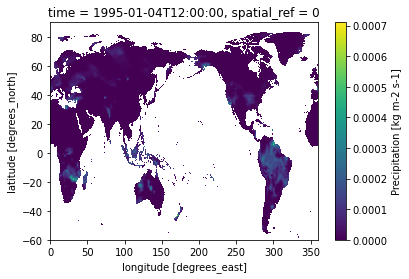

In [29]:
ds_GDDP6['pr'].isel(time=3).plot()

As we can see the centre is not a zero degrees because the longitude coordinates are not running -180 to + 180 degrees. We need to modify this

In [30]:
ds_GDDP6.coords

Coordinates:
  * time         (time) datetime64[ns] 1995-01-01T12:00:00 ... 1995-12-31T12:...
  * lat          (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
    spatial_ref  int64 0

In [31]:
ds_GDDP6.coords['lon'] = (ds_GDDP6.coords['lon'] + 180) % 360 - 180

In [32]:
#and sort
ds_GDDP6 = ds_GDDP6.sortby(ds_GDDP6.lon)

In [33]:
ds_GDDP6

<xarray.Dataset>
Dimensions:      (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-01T12:00:00 ... 1995-12-31T12:...
  * lat          (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    spatial_ref  int64 0
Data variables:
    pr           (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T14:00:02.633490+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T14:00:02.633490+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0

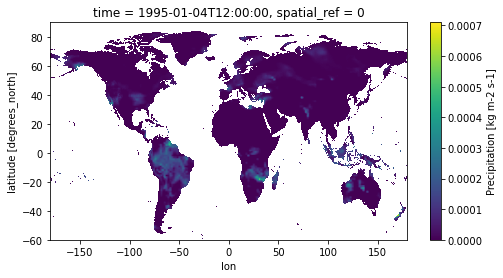

In [34]:
ds_GDDP6['pr'].isel(time=3).plot(figsize=(8,4))

# Units Conversion

pr (precipitation) is provided in $Kg \ m^2 \ s^{-1}$. This is equivalent to $mm \ s^{-1}$ (considering the density of water)

Because the data is provided as daily data, inorder to get units of $mm \ d^{-1}$, we have to multiply by $24 \cdot 60 \cdot 60$

In [35]:
secs_in_a_day = 24*60*60

ds_GDDP6['pr_mmd'] = (ds_GDDP6['pr']*secs_in_a_day).round(2).astype('float32')

Let's see if the variable 'pr_mmd' has been added to the dataset

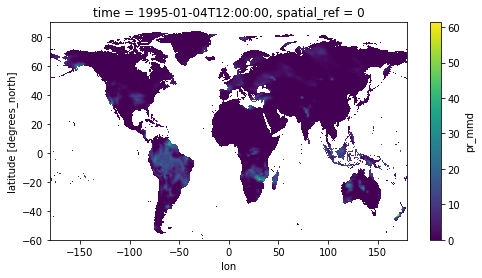

In [36]:
ds_GDDP6['pr_mmd'].isel(time=3).plot(figsize=(8,4))

# Plot the data - Single Image

In [37]:
#stamen_terrain = cimgt.Stamen('terrain-background')

In [38]:
ds_GDDP6['pr_mmd'].time.values[3]

numpy.datetime64('1995-01-04T12:00:00.000000000')

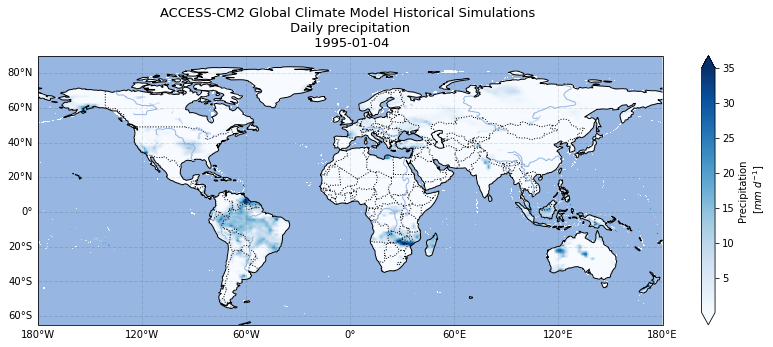

In [39]:

time_plt =  3 # date to plot


fig = plt.figure()
fig.set_size_inches(14, 11)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-180, 180, -65, 90], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add background
#ax.add_image(stamen_terrain, 8)
### add data
ds_GDDP6['pr_mmd'].isel(time=time_plt).plot(cmap=plt.cm.Blues, vmin=0.1, vmax=35,
                                  cbar_kwargs={"label": "Precipitation \n [$mm \ d^{-1}$]", 'shrink':0.45})

#plt.colorbar().set_title('',fontsize=8)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

#### date to string

tym =  ds_GDDP6['pr_mmd'].time.values[time_plt]
dateStr = np.datetime_as_string(tym, unit='D')


###
ax.set_title('ACCESS-CM2 Global Climate Model Historical Simulations \n Daily precipitation \n {}'.format(dateStr),
             y=1.01,
             fontsize=13)


plt.show()


# Compute  Annual Total

Since each datafile has data for one year only, we can just simply sum the units converted data

In [40]:
ds_GDDP6['pr_mmyr']  = ds_GDDP6['pr_mmd'].sum('time').round(2).astype('float32')

In [41]:
ds_GDDP6 # there is a new variable: pr_mmyr

<xarray.Dataset>
Dimensions:      (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-01T12:00:00 ... 1995-12-31T12:...
  * lat          (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    spatial_ref  int64 0
Data variables:
    pr           (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    pr_mmd       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    pr_mmyr      (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T14:00:02.633490+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T14:00:02.633490+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       ACCESS-CM2
    cmip6_institution_id:  CSIRO-ARCCSS
    cmip6_license:         CC-BY-SA 4.0

## Plot Annual Total Precipitation

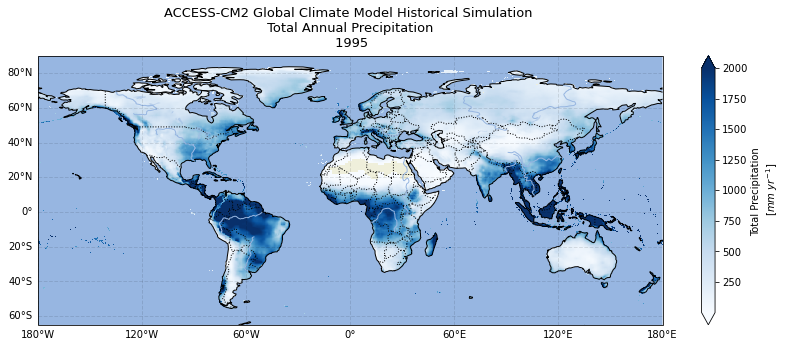

In [44]:
fig = plt.figure()
fig.set_size_inches(14, 11)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-180, 180, -65, 90], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add background
#ax.add_image(stamen_terrain, 8)
### add data

## mask and plot using where

ds_GDDP6['pr_mmyr'].where(ds_GDDP6['pr_mmyr']>0).plot(cmap=plt.cm.Blues, vmin=0.1, vmax=2000,
                                                     cbar_kwargs={"label": "Total Precipitation \n [$mm \ yr^{-1}$]",
                                                                  'shrink':0.45})

#plt.colorbar().set_title('',fontsize=8)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

###
ax.set_title('ACCESS-CM2 Global Climate Model Historical Simulation \n Total Annual Precipitation \n 1995', 
             y=1.01, 
             fontsize=13)


plt.show()
